In [53]:
#%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import re

In [54]:
  
files=(glob.glob("*.txt",recursive=False))
df2 = pd.DataFrame(index=None,columns = ('name','sex','number','year'))


result = pd.concat([pd.read_csv(f,names = ('name','sex','number','year')) for f in files[1:]],axis=0, ignore_index=True,)

lst = []
for f in files[1:]:
    df = pd.read_csv(f)
    count = df.shape[0]
    
    
    for i in range(count+1):
        lst.append(f)
      

#print(result.iloc[0])
#print(result.iloc[1])
#print(result.iloc[1998])

for i in range(len(lst)):
    lst[i]= re.findall('\d+',lst[i])
    lst[i] = lst[i][0]

result['year'] = lst

result.head(10)
    

,name,sex,number,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


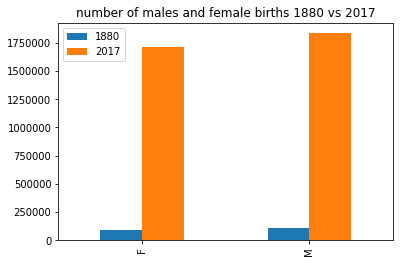

In [110]:

group_res = result.groupby(['name']).sum()['number']
#groupby sex and year
group_gender = result.groupby(['sex','year']).sum()['number'].unstack()
#compare_1880_2017 = group_gender
#group_gender.iloc[0][-1]
group_gender2 = pd.DataFrame(index = ['F','M'],columns=('1880','2017'))

group_gender2.iloc[0]['1880'] = group_gender.iloc[0]['1880']
group_gender2.iloc[1]['1880'] = group_gender.iloc[1]['1880']
group_gender2.iloc[0]['2017'] = group_gender.iloc[0]['2017']
group_gender2.iloc[1]['2017'] = group_gender.iloc[1]['2017']

group_gender2.plot.bar(title='number of males and female births 1880 vs 2017')

#oup_gender.plot.bar(xgroup_gender.columns,y=)



In [126]:
#convert groupby object into a dataframe
group_res1 = pd.DataFrame(group_res,columns=['name','number'])

In [128]:
group_res1.head(10)

,name,number
name,,
Aaban,NaN,107
Aabha,NaN,35
Aabid,NaN,10
Aabir,NaN,5
Aabriella,NaN,32
Aada,NaN,5
Aadam,NaN,254
Aadan,NaN,130
Aadarsh,NaN,199


In [123]:
sorted = group_res1.sort_values(by='number',axis=0,ascending=False)

In [124]:
sorted.head(10)

,name,number
name,,
James,NaN,5173828
John,NaN,5137142
Robert,NaN,4834915
Michael,NaN,4372536
Mary,NaN,4138360
William,NaN,4118553
David,NaN,3624225
Joseph,NaN,2614083
Richard,NaN,2572613


In [131]:
top10names = sorted.head(n=10) 


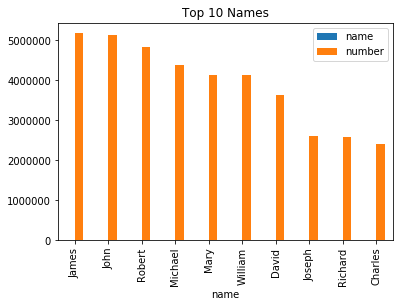

In [142]:
#plt.barh(list(top10names['name']),list(top10names['number']))
#plt.xlabel("Number of names")
#plt.ylabel("names")
top10names.plot.bar(title='Top 10 Names')

In [143]:
bottom10names = sorted.tail(n=10) 


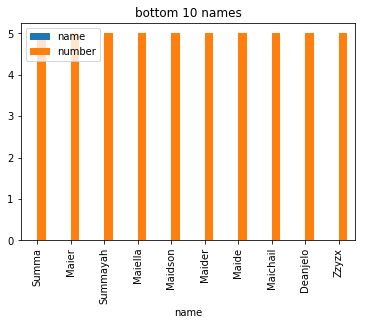

In [144]:
#plt.barh(list(bottom10names['name']),list(bottom10names['number']))
#plt.xlabel("Number of names")
#plt.ylabel("names")
bottom10names.plot.bar(title='bottom 10 names')

Text(0.5,1,'Gender split since 1880')

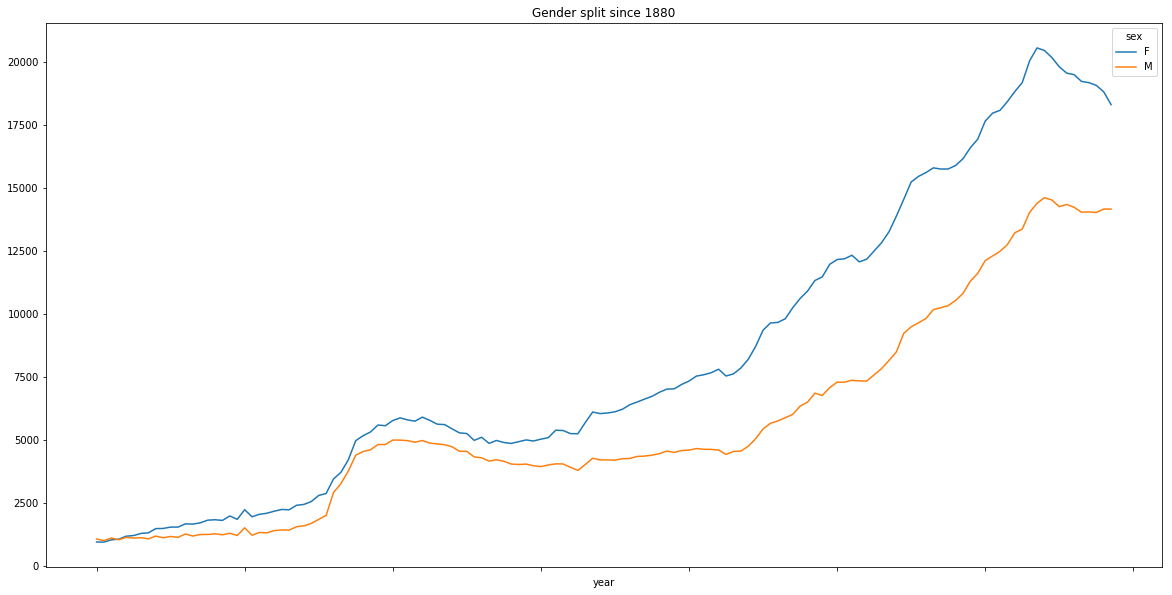

In [91]:
fig, ax = plt.subplots(figsize=(20,10))
#result.groupby(['year','sex']).count()['number'].unstack().plot(ax=ax)
result.groupby(['year','sex']).count()['number'].unstack().plot(ax=ax)
#gen['year'] = gen.index
#gen.head(20)
#ax.plot(x=list(gen['M']),y=list(gen['F']))
ax.set_title('Gender split since 1880')



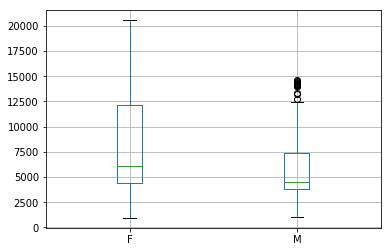

In [88]:
group_sex = result.groupby(['year','sex']).count()['number'].unstack()
group_sex.head(10)

group_sex.boxplot()


In [55]:
#popular names in each year
popular = result.groupby(['year'])[['number']].max()
mer = pd.merge(popular,result,how='inner')
fin = mer.sort_values(by='year')
fin
#plt.scatter(list(fin['year']),list(fin['name']))



,number,name,sex,year
0,9655,John,M,1880
2,8769,John,M,1881
4,9557,John,M,1882
8,8894,John,M,1883
11,9388,John,M,1884
14,9128,Mary,F,1885
16,9889,Mary,F,1886
18,9888,Mary,F,1887
19,11754,Mary,F,1888
20,11648,Mary,F,1889


In [56]:
result.aggregate

<bound method DataFrame.aggregate of               name sex  number  year
0             Mary   F    7065  1880
1             Anna   F    2604  1880
2             Emma   F    2003  1880
3        Elizabeth   F    1939  1880
4           Minnie   F    1746  1880
5         Margaret   F    1578  1880
6              Ida   F    1472  1880
7            Alice   F    1414  1880
8           Bertha   F    1320  1880
9            Sarah   F    1288  1880
10           Annie   F    1258  1880
11           Clara   F    1226  1880
12            Ella   F    1156  1880
13        Florence   F    1063  1880
14            Cora   F    1045  1880
15          Martha   F    1040  1880
16           Laura   F    1012  1880
17          Nellie   F     995  1880
18           Grace   F     982  1880
19          Carrie   F     949  1880
20           Maude   F     858  1880
21           Mabel   F     808  1880
22          Bessie   F     796  1880
23          Jennie   F     793  1880
24        Gertrude   F     787  1880
2